In [1]:
%matplotlib inline

In [239]:
import glob

In [56]:
import numpy as np

In [246]:
from collections import defaultdict

In [2]:
from matplotlib import pyplot as plt

In [3]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [4]:
import cPickle

In [26]:
plt.style.use('seaborn')

In [119]:
ws = cPickle.load(open('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001_20180424-124312/collect_eval_test_result.pkl', 'rb'))
bf = cPickle.load(open('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_sp_bs512_lr0.001_20180423-231715/collect_eval_test_result.pkl', 'rb'))
bf_ws = cPickle.load(open('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_bs512_lr0.001_20180423-205117/collect_eval_test_result.pkl', 'rb'))
noc_bf_ws = cPickle.load(open('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_noc_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_noc_bf_or_wordset_4801_bs512_lr0.001_20180424-171148/collect_eval_test_result.pkl', 'rb'))

In [243]:
ws.keys()

['test_obj_only_score',
 'test_attr_only_score',
 'testonly_score_num_point',
 'test_attr_only_score_num_point',
 'iter',
 'test_obj_only_score_num_point',
 'testonly_score']

# single line plot

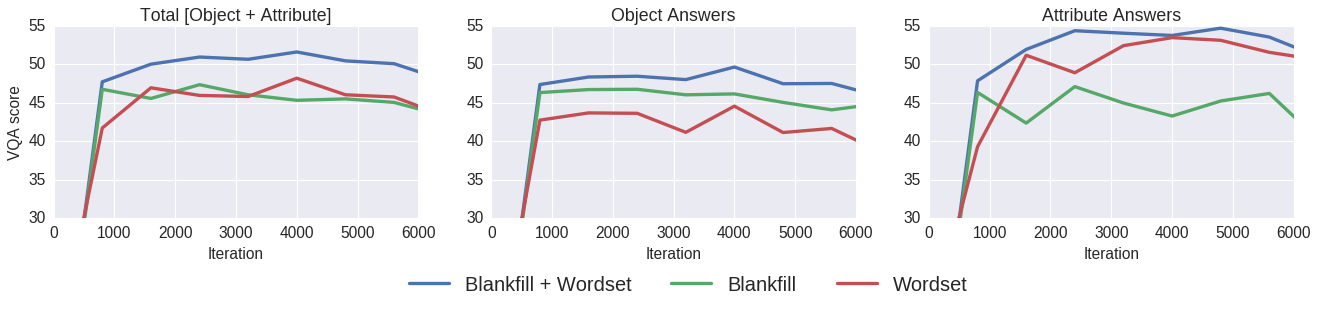

In [236]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)

name = 'testonly_score'
plt.subplot(131)
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Total [Object + Attribute]', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

name = 'test_obj_only_score'
plt.subplot(132)
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Object Answers', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

name = 'test_attr_only_score'
plt.subplot(133)
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Attribute Answers', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.43, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/data_comparison.png',bbox_inches='tight')
plt.show()

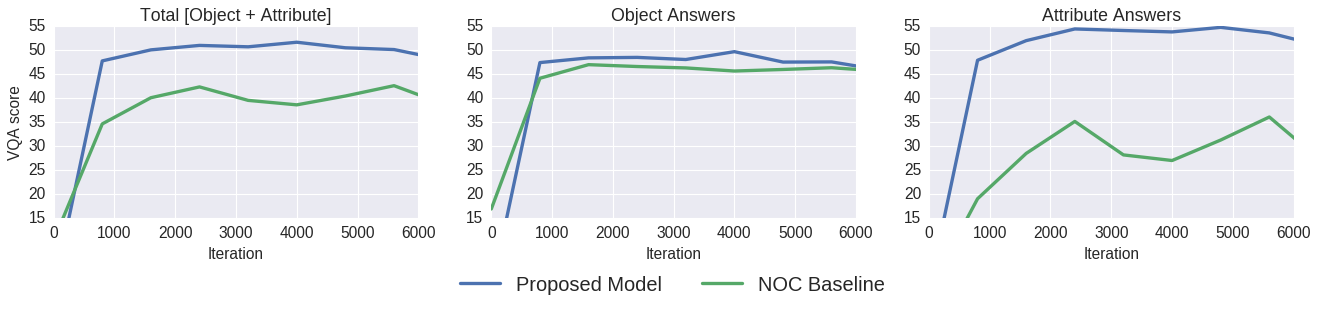

In [237]:
plt.figure(figsize=(20,4))
#plt.suptitle('Model Comaprisions', fontsize=20, x=0.51, y=1.08)

name = 'testonly_score'
plt.subplot(131)
for res in [bf_ws, noc_bf_ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Total [Object + Attribute]', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((15, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

name = 'test_obj_only_score'
plt.subplot(132)
for res in [bf_ws, noc_bf_ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Object Answers', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((15, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

name = 'test_attr_only_score'
plt.subplot(133)
for res in [bf_ws, noc_bf_ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.title('Attribute Answers', fontsize=16)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((15, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Proposed Model', 'NOC Baseline'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.42, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/model_comparison.png',bbox_inches='tight')
plt.show()

In [247]:
a = defaultdict(list)

In [238]:
ls experiments/important/0430_vlmap2vqa_diverse_seed/

vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_withatt_sp_bs512_lr0.001_seed123_20180429-124446/
vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_withatt_sp_bs512_lr0.001_seed234_20180429-133803/
vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_withatt_sp_bs512_lr0.001_seed345_20180429-142427/
vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_withatt_sp_bs512_lr0.001_seed123_20180429-164751/
vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_withatt_sp_bs512_lr0.001_seed234_20180429-173500/
vqa

In [290]:
dirs_dict = {}
dirs_dict['ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_wordset_only_*')
dirs_dict['ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001_20180424-124312')
dirs_dict['bf'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_bf_only_*')
dirs_dict['bf'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_only_sp_bs512_lr0.001_20180423-231715')
dirs_dict['bf_ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*my_bf_or_wordset_*')
dirs_dict['bf_ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_bs512_lr0.001_20180423-205117')
dirs_dict['noc_bf_ws'] = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*my_noc_bf_or_wordset_*')
dirs_dict['noc_bf_ws'].append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_noc_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_noc_bf_or_wordset_4801_bs512_lr0.001_20180424-171148')

In [274]:
titles = ['Total [Object + Attribute]', 'Object Answers', 'Attribute Answers']
names = ['testonly_score', 'test_obj_only_score', 'test_attr_only_score']

In [321]:
data_dict = {}
data_summary_dict = {}
for key in dirs_dict:
    data_dict[key] = defaultdict(list)
    for a_dir in dirs_dict[key]:
        r = cPickle.load(open(os.path.join(a_dir, 'collect_eval_test_result.pkl'), 'rb'))
        for r_key in r:
            data_dict[key][r_key].append(r[r_key])
   
    min_len = min([len(l) for l in data_dict[key]['iter']])
    data_summary_dict[key] = {}
    data_summary_dict[key]['iter'] = data_dict[key]['iter'][0][:min_len]
    
    for name in names:
        data_summary_dict[key][name] = []
        for w in data_dict[key][name]:
            data_summary_dict[key][name].append(w[:min_len])
    
        data_summary_dict[key][name] = np.array(data_summary_dict[key][name])
        data_summary_dict[key][name + '_mean'] = data_summary_dict[key][name].mean(axis=0)
        data_summary_dict[key][name + '_std'] = data_summary_dict[key][name].std(axis=0)

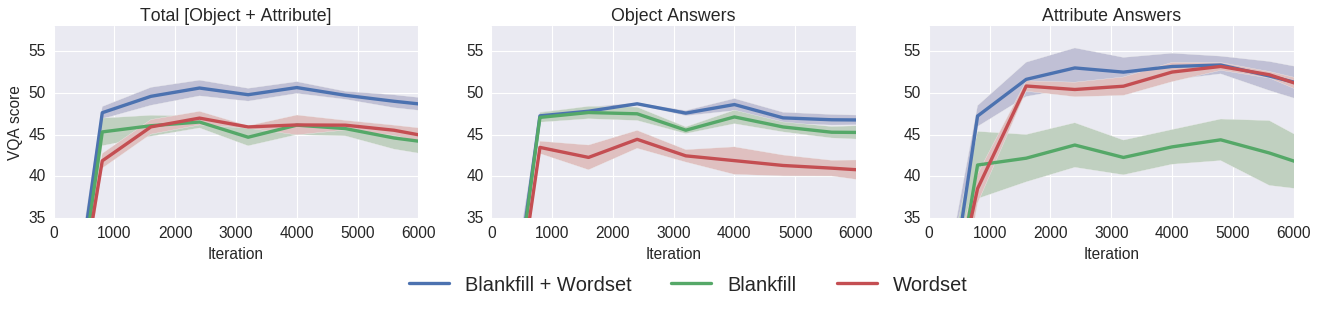

In [382]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)
y_lims = [(35, 58), (35, 58), (35, 58)]
facecolors = {
    'bf_ws': '#c0c0d5',
    'bf': '#c0d0c0',
    'ws': '#dfc0c0',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['bf_ws', 'bf', 'ws']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3)
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key])

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.43, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/data_comparison_with_std.png',bbox_inches='tight')
plt.show()

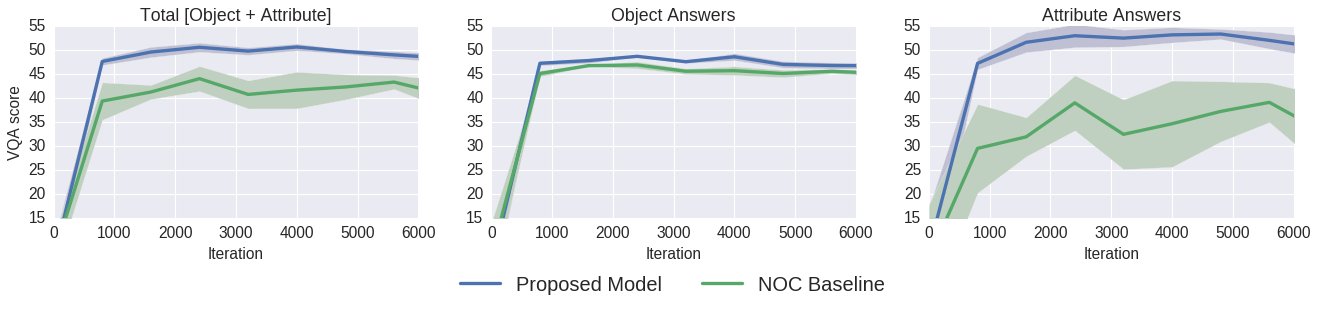

In [381]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)
y_lims = [(15, 55), (15, 55), (15, 55)]
facecolors = {
    'bf_ws': '#c0c0d5',
    'noc_bf_ws': '#c0d0c0',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['bf_ws', 'noc_bf_ws']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3)
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key])

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Proposed Model', 'NOC Baseline'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.42, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/model_comparison_with_std.png',bbox_inches='tight')
plt.show()

In [244]:
ws_dirs = glob.glob('experiments/important/0430_vlmap2vqa_diverse_seed/*_wordset_only_*')
ws_dirs.append('experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001_20180424-124312')

In [245]:
ws_dirs

['experiments/important/0430_vlmap2vqa_diverse_seed/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_withatt_sp_bs512_lr0.001_seed123_20180429-190713',
 'experiments/important/0430_vlmap2vqa_diverse_seed/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_withatt_sp_bs512_lr0.001_seed345_20180429-203903',
 'experiments/important/0430_vlmap2vqa_diverse_seed/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_withatt_sp_bs512_lr0.001_seed234_20180429-195308',
 'experiments/important/0424_main_contribution_exp_answer_zs_3div4/vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_wordset_only_sp_bs512_lr0.001

In [251]:
ws_data = defaultdict(list)
for ws_dir in ws_dirs:
    r = cPickle.load(open(os.path.join(ws_dir, 'collect_eval_test_result.pkl'), 'rb'))
    for key in r:
        ws_data[key].append(r[key])

In [253]:
min_len = min([len(l) for l in ws_data['iter']])

In [254]:
min_len

10

In [258]:
ws_summary = {}
ws_summary['iter'] = ws_data['iter'][0][:min_len]

In [272]:
for name in names:
    ws_summary[name] = []
    for w in ws_data[name]:
        ws_summary[name].append(w[:min_len])
    ws_summary[name] = np.array(ws_summary[name])
    ws_summary[name + '_mean'] = ws_summary[name].mean(axis=0)
    ws_summary[name + '_std'] = ws_summary[name].std(axis=0)

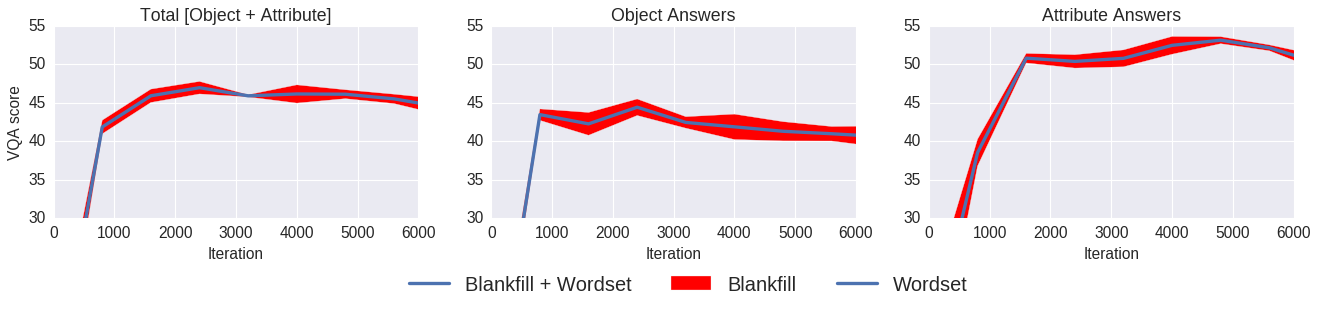

In [278]:
plt.figure(figsize=(20,4))
#plt.suptitle('Liguistic Knowledge Sources Comparison', fontsize=20, x=0.51, y=1.08)

for i, (title, name) in enumerate(zip(titles, names)):
    plt.subplot(1, 3, i+1)
    for res in [ws_summary]:
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3)
        plt.fill_between(x, y - y_err, y + y_err, facecolor='red')

    plt.title(title, fontsize=16)
    #plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
    plt.ylim((30, 55))
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=14)
    plt.xlabel('Iteration', fontsize=14)

plt.figlegend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.43, 0))
plt.subplots_adjust(bottom=0.3)
#plt.figlegend( lines, labels, loc = 'lower center', ncol=5, labelspacing=0. )

#plt.tight_layout()
plt.savefig('plots/data_comparison_with_std.png',bbox_inches='tight')
plt.show()

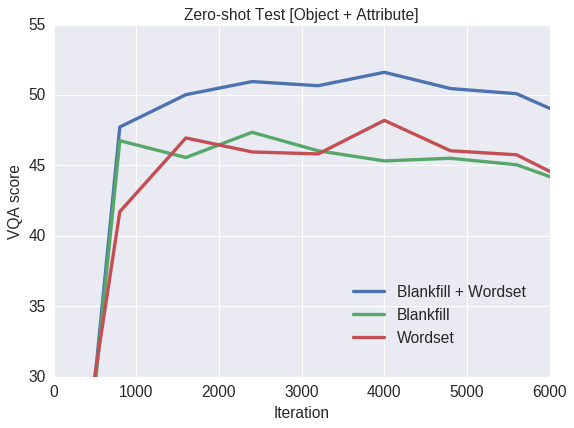

In [125]:
name = 'testonly_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Object + Attribute]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

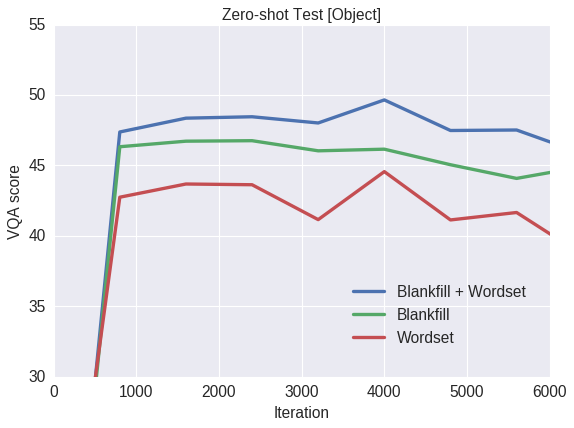

In [126]:
name = 'test_obj_only_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Object]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

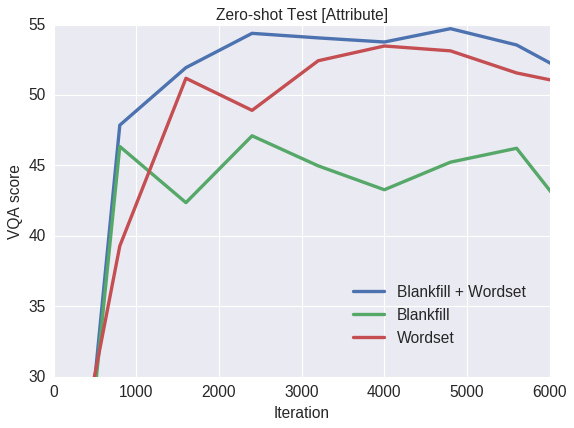

In [127]:
name = 'test_attr_only_score'
for res in [bf_ws, bf, ws]:
    plt.plot(res['iter'], np.array(res[name]) * 100, linewidth=3)

plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot Test [Attribute]', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

In [7]:
iterations = wordset_only['iter']
ws = wordset_only['testonly_score']
bf = bf_only['testonly_score']
bf_ws = bf_or_wordset['testonly_score']
noc_bf = noc_bf_or_wordset['test']

In [75]:
help(plt.xaxis)

AttributeError: 'module' object has no attribute 'xaxis'

In [104]:
import os

In [109]:
target_dir = 'experiments/important/0429_vlmap_bf_or_wordset_different_seed/'
dir1 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_bs512_lr0.001_20180423-205117'
dir2 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_original10_bs512_lr0.001_20180429-041504'
dir3 = 'vqa_vlmap_answer_d_qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1_tf_record_memft_vfeat_bottomup_36_my_bf_or_wordset_sp_original11_bs512_lr0.001_20180429-044746'

In [110]:
path1 = os.path.join(target_dir, dir1, 'collect_eval_test_result.pkl')
path2 = os.path.join(target_dir, dir2, 'collect_eval_test_result.pkl')
path3 = os.path.join(target_dir, dir3, 'collect_eval_test_result.pkl')
paths = [path1, path2, path3]

In [111]:
pkls = []
for path in paths:
    pkls.append(cPickle.load(open(path)))

In [114]:
pkls[0].keys()

['test_obj_only_score',
 'test_attr_only_score',
 'testonly_score_num_point',
 'test_attr_only_score_num_point',
 'iter',
 'test_obj_only_score_num_point',
 'testonly_score']

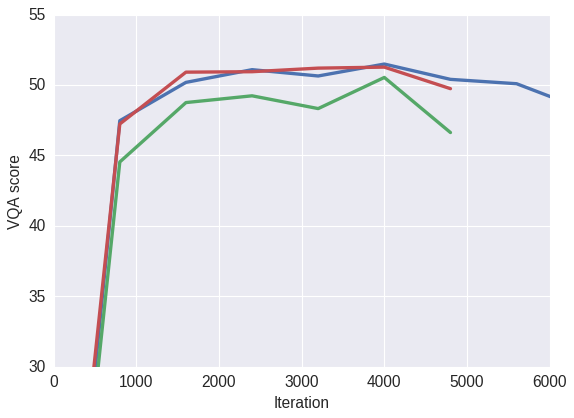

In [115]:
name = 'testonly_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

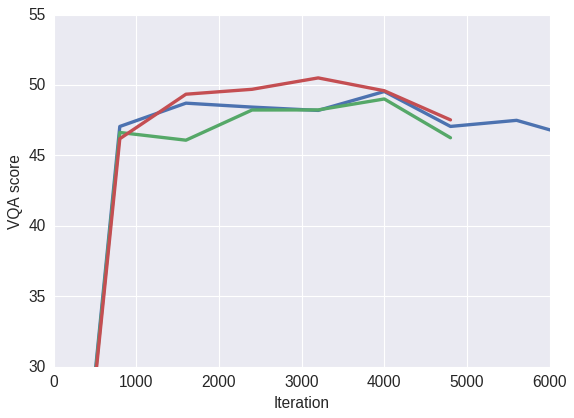

In [116]:
name = 'test_obj_only_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

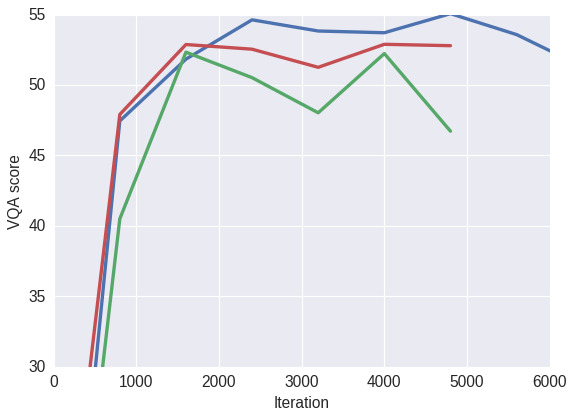

In [117]:
name = 'test_attr_only_score'
for pkl in pkls:
    plt.plot(pkl['iter'], np.array(pkl[name]) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
#plt.title('Zero-shot test VQA score', fontsize=14)
#plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

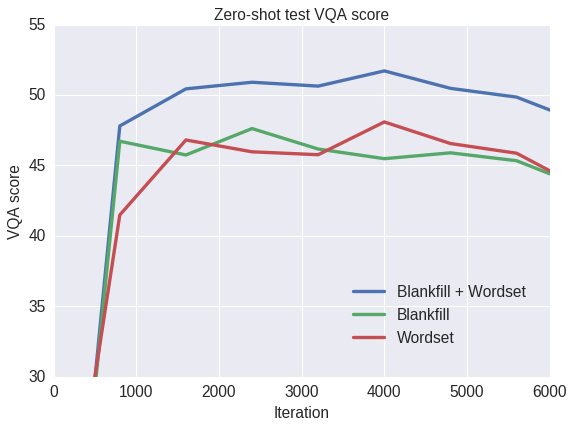

In [102]:
plt.plot(iterations, np.array(bf_ws) * 100, linewidth=3)
plt.plot(iterations, np.array(bf) * 100, linewidth=3)
plt.plot(iterations, np.array(ws) * 100, linewidth=3)
#plt.legend(['BF + WS', 'BF', 'WS'], loc='lower right', bbox_to_anchor=(0.9, 0.5), fontsize=15)
plt.title('Zero-shot test VQA score', fontsize=14)
plt.legend(['Blankfill + Wordset', 'Blankfill', 'Wordset'], loc='lower right', bbox_to_anchor=(0.98, 0.05), fontsize=14)
plt.ylim((30, 55))
plt.xlim((0, 6000))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('VQA score', fontsize=14)
plt.xlabel('Iteration', fontsize=14)
plt.show()

In [6]:
wordset_only

{'iter': [1, 801, 1601, 2401, 3201, 4001, 4801, 5601, 6401, 7201],
 'testonly_score': [0.1091049,
  0.41483992,
  0.46810886,
  0.45969138,
  0.4576435,
  0.48089606,
  0.46557546,
  0.45868668,
  0.4337996,
  0.42015192],
 'testonly_score_num_point': [20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802,
  20802]}

In [ ]:
iterations = [1,801,1601,2401,3201,4001,4801,5601,6401,7201]